<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">Regression with a Backpack Prediction Dataset
</h1>  
     
</div>

<p><center style="color:blue; font-family: 'Dancing Script'; font-size:30px;">🙏🏿Thanks for visiting my notebook 🕺🏿</center></p>

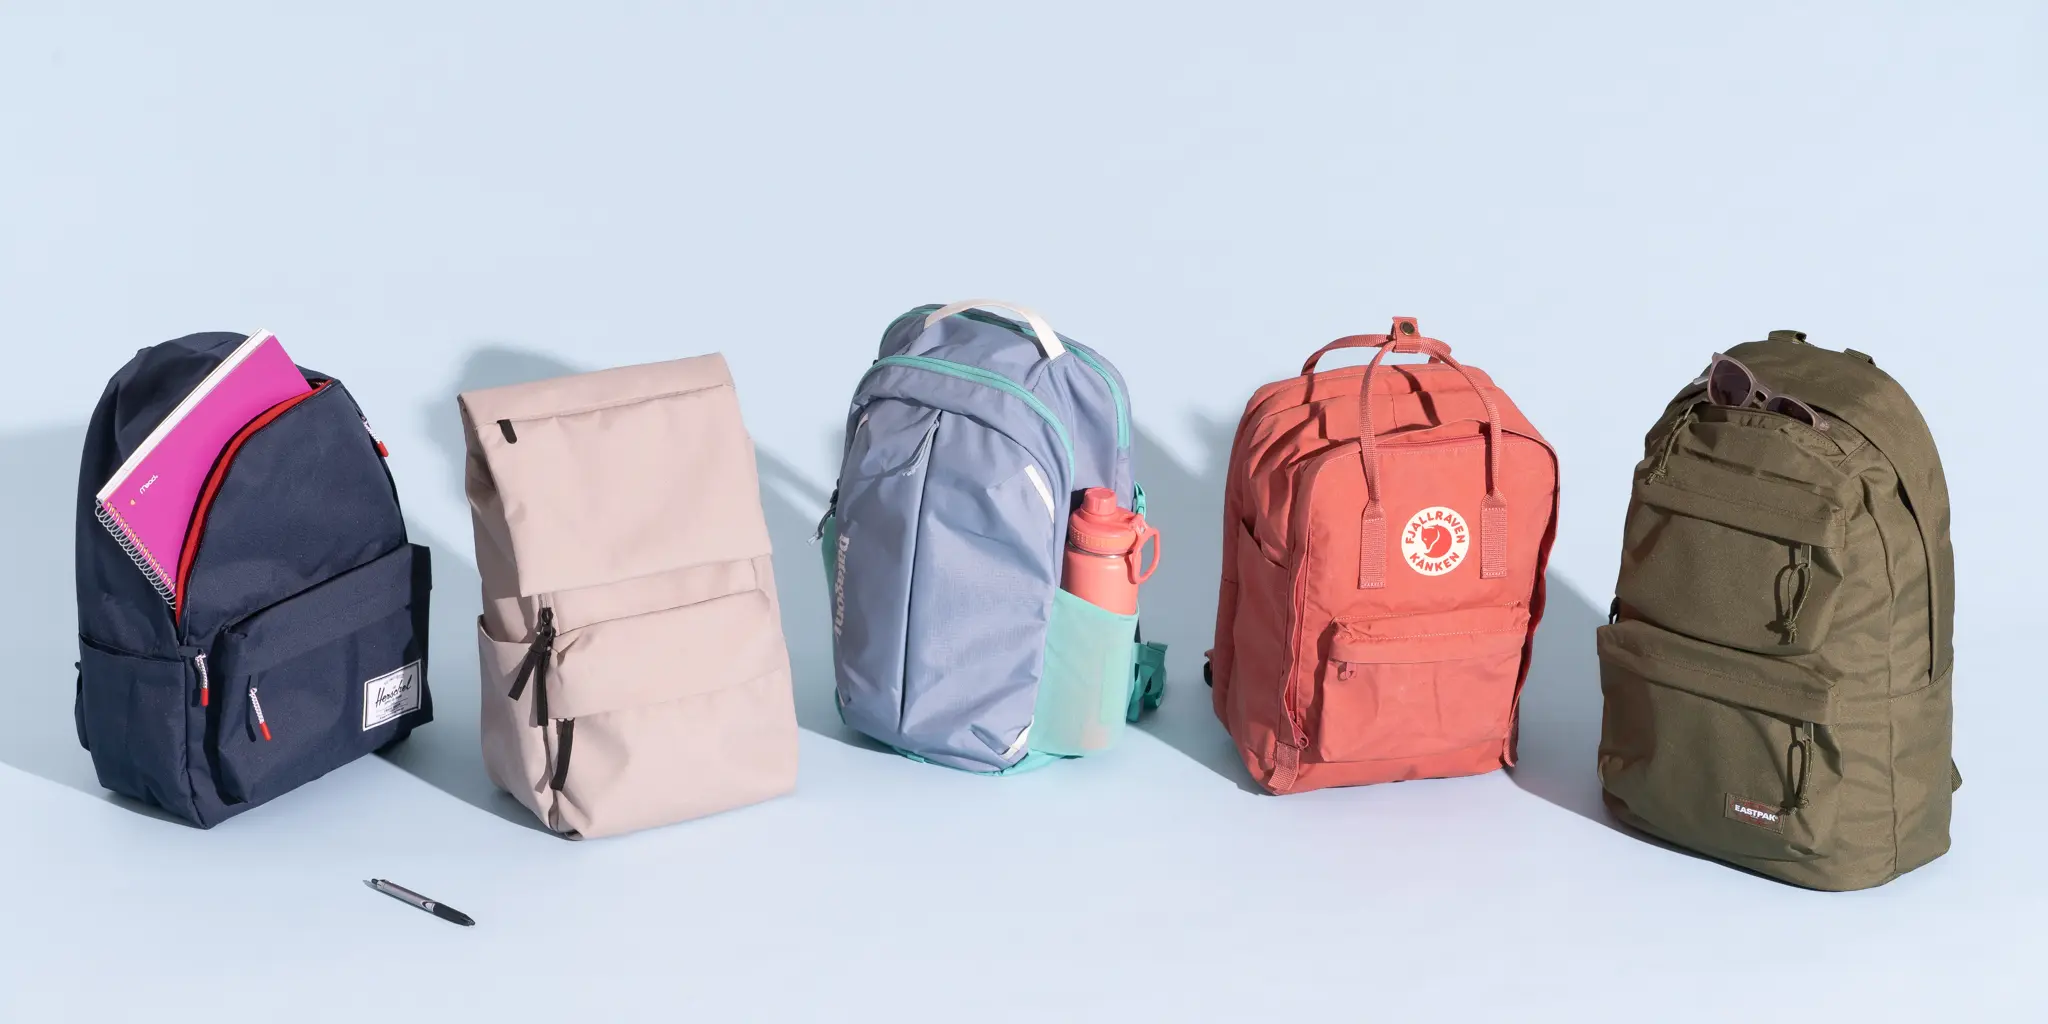
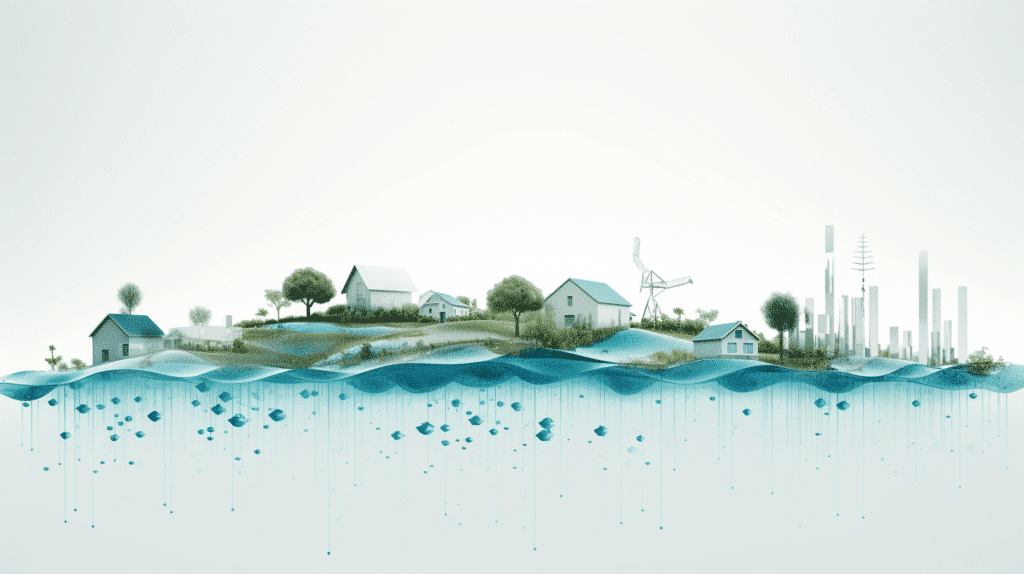
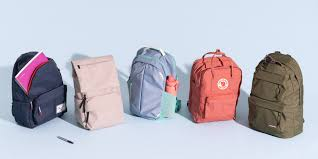

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: Predict the price of backpacks based on various attributes

**Dataset**: Features include brand, material, size, compartments, waterproofing, and weight capacity.Generated using a deep learning model trained on the Student Bag Price Prediction Dataset.

**Exploration**: Explore differences between this dataset and the original Flood Prediction Factors dataset.
Investigate whether incorporating the original dataset into training improves model performance.
Utilize visualization techniques for EDA.
The dataset is suitable for clustering analysis.

**Evaluation**: Root Mean Squared Error (RMSE)..

**Submission**: train.csv – Training dataset with price labels.
                test.csv – Test dataset without price labels.
                sample_submission.csv – Required submission format.

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

<h3 align="center"><font color='black'>💡 Evalaution Metric :</font></h3>
    
    
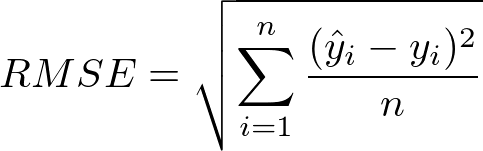
    



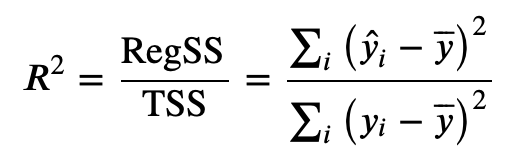

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Packages :</font></h3>
    
🎭we are Importing several Python packages 
    
🧨 Sklearn have,Kfold, mean_squared_error, mean_absolute_error, median_absolute_error.


🥽 XGBoost (eXtreme Gradient Boosting) and LightGBM are both powerful machine learning algorithms used for supervised learning tasks, particularly in the realm of gradient boosting

    
🎍Numpy, Pandas, Matplotlib, Seaborn :NumPy for numerical computing, Pandas for data manipulation, Matplotlib for plotting, and Seaborn for statistical visualization.
    



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
df_train_ex = pd.read_csv('/kaggle/input/playground-series-s5e2/training_extra.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s5e2/sample_submission.csv')

In [ ]:
df_train.head()

In [ ]:
df_train.describe()

In [ ]:
df_train_ex.shape,df_train.shape

In [ ]:
df_train = pd.concat([df_train_ex, df_train], axis=0).reset_index(drop=True)
df_train.shape

In [ ]:
df_train = df_train[:4318]

In [ ]:
df_test.head()

In [ ]:
df_sub.head()

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">⚠🍜Exploratory Data Analysis♒🌊</h1>  
     
</div>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_train["Price"], bins=10, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price ($)")

plt.subplot(1, 3, 2)
sns.histplot(df_train["Compartments"], bins=10, kde=True, color='green')
plt.title("Compartments Distribution")
plt.xlabel("Number of Compartments")

plt.subplot(1, 3, 3)
sns.histplot(df_train["Weight Capacity (kg)"], bins=10, kde=True, color='red')
plt.title("Weight Capacity Distribution")
plt.xlabel("Weight Capacity (kg)")

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df_train["Price"], color='blue')
plt.title("Boxplot of Price")

plt.subplot(1, 3, 2)
sns.boxplot(x=df_train["Compartments"], color='green')
plt.title("Boxplot of Compartments")

plt.subplot(1, 3, 3)
sns.boxplot(x=df_train["Weight Capacity (kg)"], color='red')
plt.title("Boxplot of Weight Capacity")

plt.tight_layout()
plt.show()

In [ ]:
categorical_features = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]
plt.figure(figsize=(15, 18))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df_train[col], y=df_train["Price"], palette="coolwarm")
    plt.xticks(rotation=45)
    plt.ylabel("Price ($)")
    plt.title(f"Price Distribution by {col}")

plt.tight_layout()

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Brand', data=df_train, palette='viridis')
plt.title('Brand Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Material', data=df_train, palette='Set2')
plt.title('Material Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
missing_data = df_train.isnull().sum()
missing_data = missing_data[missing_data > 0] 

if not missing_data.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data.index, y=missing_data.values)
    plt.title('Missing Value Distribution in df_train')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No missing values in the dataset.")

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(12, 6))
mosaic(df_train, ['Brand', 'Style'], title="Brand vs. Style Distribution")
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x="Material", hue="Waterproof", palette="pastel")
plt.xticks(rotation=45)
plt.title("Material vs. Waterproof Feature")
plt.xlabel("Material")
plt.ylabel("Count")
plt.legend(title="Waterproof")
plt.show()


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    
    
The **dataset** contains **300,000** rows.The column Price has **299,862** non-null values, meaning **138** values are **missing**.

**Dense Data Points**:
The lineplot is heavily overpopulated because of a very large number of data points (likely ~300,000 ).This makes it hard to discern any meaningful patterns.No Apparent Trends or Fluctuations:The target variable on the appears relatively constant or uniformly distributed across the dataset.This may indicate:A constant or low-variance target variable, which might affect the model's ability to learn patterns.Noise or randomness in the data.

    
**Compartments**, The number of compartments varies between **1 and 10**.The **mean** number of compartments is **5.44**, with a **median** of 5, suggesting a relatively balanced distribution.
    
**Weight Capacity (kg)**,The weight capacity **ranges from 5 kg to 30 kg**.The **mean weight capacity is 18.03 kg**, and the **median is 18.07 kg**, indicating a near-normal distribution.
    
**Price**,The price **ranges from $15 to $150**. The mean price is $81.41, and the median is $80.96, showing a **skewed distribution.**
The **standard deviation of $39.04** suggests significant variability in backpack prices.

**Quartile Analysis** for Price, **25th percentile: $47.38 → Lower-priced  backpacks**, **50th percentile (median): $80.96 → Mid-range backpacks**
75th percentile: $115.02 → Higher-end backpacks

**Some Takeaways** : Flat or Non-Volatile Trend:The target variable (Price) has a very low variance and a **low standard deviation  ~39.04.The skewness value ~0.0368** shows that Price is nearly symmetric, indicating that it is neither strongly left- nor right-skewed.Homogeneous Pricing:Since the variance is low, most prices in the dataset are clustered within a narrow range. This could make it harder for the model to distinguish between feature influences unless there are strong patterns.


In [ ]:
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

In [ ]:
df_test.isnull().sum()

In [ ]:
df_train.isnull().sum()

In [ ]:
df_train.shape,df_test.shape

In [ ]:
#df_train = df_train[:1694318]

In [ ]:
# ***********************************Feature ENgineering    ********************************************
def feature_engineering(df):
    size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
    df['Size_Num'] = df['Size'].map(size_mapping)
    df['Compartments_per_Size'] = df['Compartments'] / df['Size_Num']    
    df['Weight_per_Compartment'] = df['Weight Capacity (kg)'] / df['Compartments'] 
    df['Waterproof'] = df['Waterproof'].map({'Yes': 1, 'No': 0})
    df['Laptop Compartment'] = df['Laptop Compartment'].map({'Yes': 1, 'No': 0})
    df['Waterproof_Laptop'] = df['Waterproof'] * df['Laptop Compartment']
    df['Is_Durable_Material'] = df['Material'].apply(lambda x: 1 if x in ['Leather', 'Nylon'] else 0)
    df['Is_Lightweight_Material'] = df['Material'].apply(lambda x: 1 if x in ['Canvas', 'Nylon'] else 0)
    df['Luxury_Material'] = df['Material'].apply(lambda x: 1 if x == 'Leather' else 0)
    df['Professional_Style'] = df['Style'].apply(lambda x: 1 if x in ['Messenger', 'Tote'] else 0)
    df['Casual_Style'] = df['Style'].apply(lambda x: 1 if x in ['Backpack', 'Duffle'] else 0)
    df['Is_Premium_Brand'] = df['Brand'].apply(lambda x: 1 if x in ['Nike', 'Under Armour', 'Adidas'] else 0)
    df['Is_Budget_Brand'] = df['Brand'].apply(lambda x: 1 if x == 'Jansport' else 0)
    df['Is_Small'] = df['Size'].apply(lambda x: 1 if x == 'Small' else 0)
    df['Is_Medium'] = df['Size'].apply(lambda x: 1 if x == 'Medium' else 0)
    df['Is_Large'] = df['Size'].apply(lambda x: 1 if x == 'Large' else 0)

    return df

df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [ ]:
df_train.dtypes

In [ ]:
df_train.columns,df_test.columns

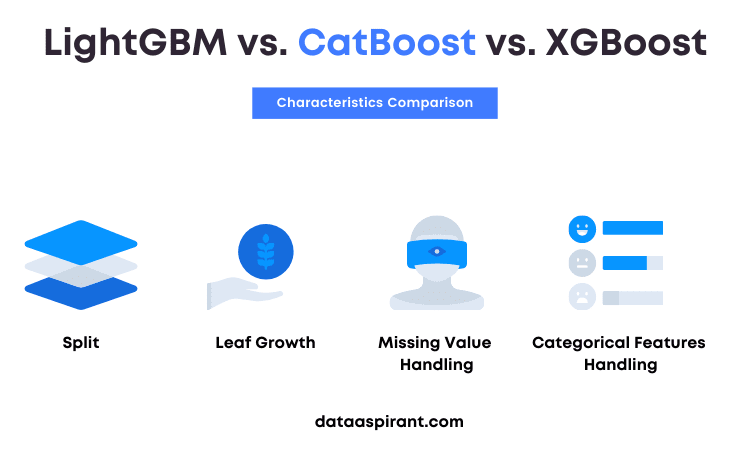

In [ ]:
df_train.isnull().sum()

*************This stop is not require as Boosting technique can take care of missing values lets give it as shot*** ******

**Part is barrowed from here : https://www.kaggle.com/code/zongaobian/catboost-optuna-playgrounds05e02-tutorial thank u zongaobian**

In [ ]:
cat = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color']

df_train[cat] = df_train[cat].fillna('None').astype('string').astype('category')
median_weight = df_train['Weight Capacity (kg)'].median()
df_train['Weight Capacity (kg) categorical'] = df_train['Weight Capacity (kg)'].fillna(median_weight).astype('string')
df_train['Weight Capacity (kg)'] = df_train['Weight Capacity (kg)'].fillna(median_weight).astype('float64')

df_test[cat] = df_test[cat].fillna('None').astype('string').astype('category')
df_test['Weight Capacity (kg) categorical'] = df_test['Weight Capacity (kg)'].fillna(median_weight).astype('string')
df_test['Weight Capacity (kg)'] = df_test['Weight Capacity (kg)'].fillna(median_weight)

In [ ]:
df_train.dtypes

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Regression Analysis♒🌊</h1>  
     
</div>

In [ ]:
y = df_train['Price'] 
df_train = df_train.drop(['Price'],axis=1)
X = df_train
X_test = df_test

In [ ]:
df_train.isnull().sum()

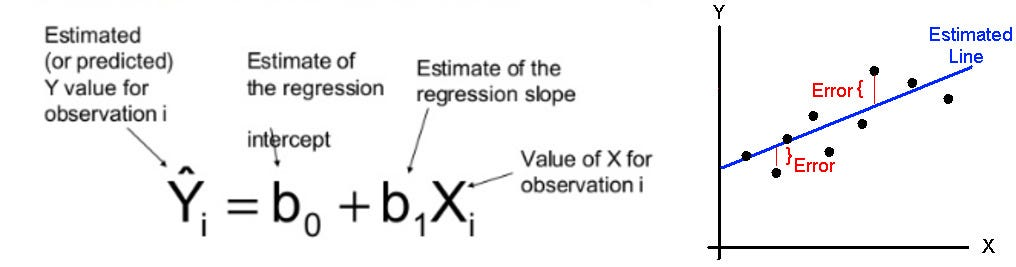

In [ ]:
print("Variance:", y.var())
print("Standard Deviation:",y.std())


In [ ]:
from scipy.stats import skew
print("Skewness:", skew(y))

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Algorithm Which requires Scaling♒🌊</h1>  
     
</div>

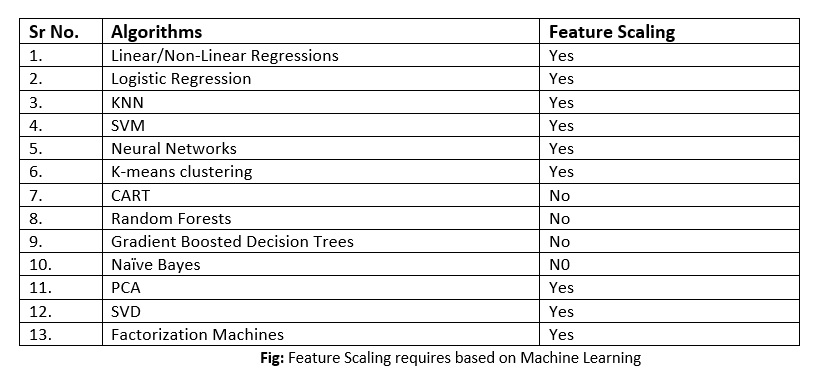

In [ ]:
scaled_train_data = X
scaled_test_data = X_test

In [ ]:
X.columns

In [ ]:
X.shape,X_test.shape

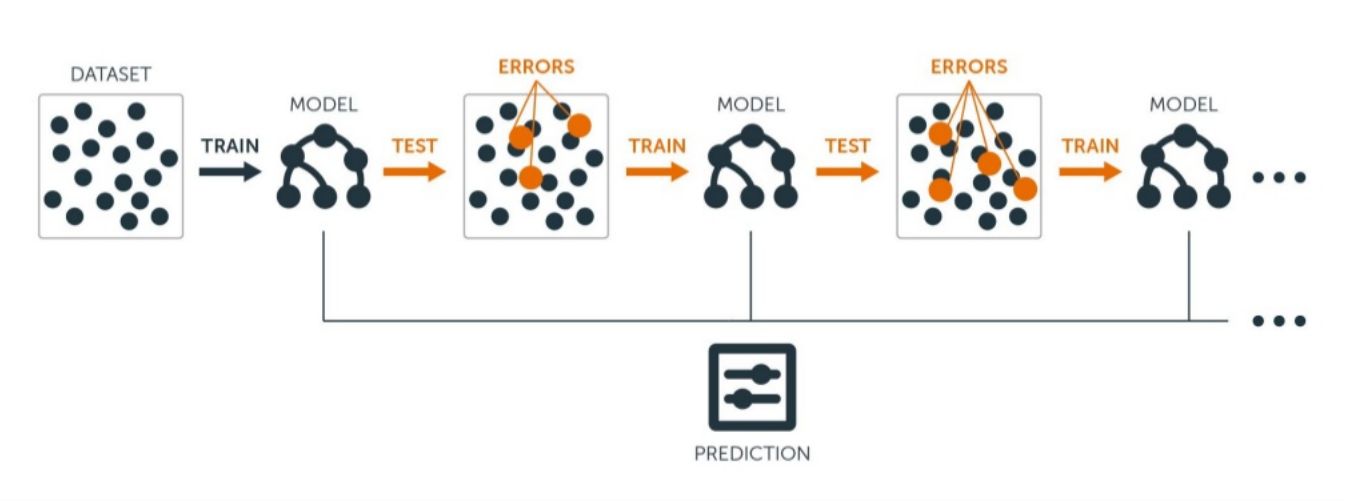

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import KFold
import gc

cat_cols = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment','Waterproof', 'Style', 'Color', 'Weight Capacity (kg) categorical']


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import KFold
import gc

catboost_params = {'learning_rate': 0.058385610787340024, 
                   'l2_leaf_reg': 7.322579713051955, 'depth': 4,
    #'task_type': 'GPU',  
    'iterations':2000, 'loss_function':'RMSE', 'eval_metric':'RMSE', 'random_seed':42
}

cat_cols = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment','Waterproof', 'Style', 'Color', 'Weight Capacity (kg) categorical']
#cat_cols = ['Brand', 'Material', 'Size', 'Style', 'Color']

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
catboost_predictions = np.zeros(len(df_train))
catboost_true_labels = np.zeros(len(df_train))
catboost_test_predictions = np.zeros(len(df_test))

for fold, (train_idx, val_idx) in enumerate(kf.split(df_train, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")

    X_train, X_val = df_train.iloc[train_idx], df_train.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    catboost_model = CatBoostRegressor(**catboost_params)
    catboost_model.fit(X_train, y_train,
                       eval_set=(X_val, y_val),cat_features=cat_cols,
                       verbose=False)
    catboost_fold_preds = catboost_model.predict(X_val)
    catboost_fold_test_preds = catboost_model.predict(df_test)
    catboost_predictions[val_idx] = catboost_fold_preds
    catboost_true_labels[val_idx] = y_val
    catboost_test_predictions += catboost_fold_test_preds / n_splits  
    fold_rmse = np.sqrt(mean_squared_error(y_val, catboost_fold_preds))
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.4f}")
overall_rmse_catboost = np.sqrt(mean_squared_error(catboost_true_labels, catboost_predictions))
print(f"Overall RMSE (CatBoostRegressor): {overall_rmse_catboost:.4f}")

In [ ]:
from catboost import  Pool

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

catboost_params = {
    'learning_rate': 0.062,
    'l2_leaf_reg': 7,
    'depth': 6,
   # 'task_type': 'GPU',  
    'iterations': 3000,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'random_seed': 42
}

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

scores = []
test_preds = []
X_test_pool = Pool(df_test, cat_features=cat_cols)

for fold, (train_idx, val_idx) in enumerate(kf.split(df_train, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")
    
    X_train, X_val = df_train.iloc[train_idx], df_train.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    X_train_pool = Pool(X_train, y_train, cat_features=cat_cols)
    X_valid_pool = Pool(X_val, y_val, cat_features=cat_cols)
    
    model = CatBoostRegressor(**catboost_params)
    model.fit(X_train_pool, eval_set=X_valid_pool, early_stopping_rounds=200, verbose=100)
    
    val_pred = model.predict(X_valid_pool)
    score = rmse(y_val, val_pred)
    scores.append(score)
    
    test_pred = model.predict(X_test_pool)
    test_preds.append(test_pred)
    
    print(f"Fold {fold + 1} RMSE: {score:.4f}")

print(f'Optimized Cross-validated RMSE score: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')
print(f'Max RMSE score: {np.max(scores):.3f}')
print(f'Min RMSE score: {np.min(scores):.3f}')


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Plots from results for XGboost♒🌊</h1>  
     
</div>

In [ ]:
catboost_residuals = np.array(catboost_predictions) - np.array(catboost_true_labels)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes[0, 0].scatter(catboost_predictions, catboost_residuals, color='blue', alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residual Plot (CatBoost)')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True)

axes[0, 1].scatter(catboost_true_labels, catboost_predictions, color='blue', alpha=0.5)
axes[0, 1].plot([min(catboost_true_labels), max(catboost_true_labels)], [min(catboost_true_labels), max(catboost_true_labels)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted Plot (CatBoost)')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].grid(True)

importances = model.get_feature_importance(prettified=True)
importances.plot(kind='bar', x='Feature Id', y='Importances', ax=axes[1, 0])
axes[1, 0].set_title('Feature Importance (CatBoost)')
axes[1, 0].set_xlabel('Feature')
axes[1, 0].set_ylabel('Importance')

axes[1, 1].hist(catboost_residuals, bins=30, color='blue', alpha=0.5)
axes[1, 1].set_title('Residual Distribution (CatBoost)')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

plt.gcf().set_facecolor('cyan')
plt.tight_layout()
plt.show()

In [ ]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
shap.waterfall_plot(shap_values[0]) 

In [ ]:
test_preds_flattened = np.mean(test_preds, axis=0)
test_preds_flattened

In [ ]:
catboost_test_predictions.shape

In [ ]:
df_test['Price'] = test_preds_flattened

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Catboost♒🌊</h1>  
     
</div>

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭lightgbm♒🌊</h1>  
     
</div>

In [ ]:
df_sub.head()

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">⚒🌊How well The prediction fit♒🌊</h1>  
     
</div>

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🗞📜Final Submission♒🌊</h1>  
     
</div>

In [ ]:
df_sub['Price'] = df_test['Price']
df_sub.to_csv('submission.csv', index=False)

In [ ]:
df_sub

In [ ]:
df_sub['Price'].hist()

<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">Looking Forward for feeback </h1>  
     
</div>

<a id="1.4"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b>  Refrences</b></div>

<div style="background-color: black; padding: 20px; border-radius: 10px; margin: 20px auto; max-width: 600px;">
    <center>
        <div style="background-color: white; padding: 20px; border-radius: 10px;">
            <b style="font-size: 24px; color: #ff6600;">👏😊 &nbsp; IF YOU FIND THIS HELPFUL, PLEASE UPVOTE! &nbsp; 💢👏</b>
            <div style="margin-top: 20px; font-size: 18px; color: black;">
                🥽🖥This took quite a bit of effort on my part, and while it might seem trivial, 🏆🏆receiving your appreciation means a lot to me! 😅🎃 Your upvotes inspire me to keep creating helpful content like this🖥🍱.                    
            </div>
        </div>
    </center>
</div>